# MSMPR modelling Without recycle

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.integrate import solve_ivp

def generateODE(t,m):
    
    m0, m1, m2, m3, m4, m5, phi, M, c = m
    
    Ci = 0.20
    T = 40 
    Qi = 0.25*10**(-6)
    Qfi = 0.25*10**(-6)
    rhoc = 1545
    rhof = 1092
    rho_as = 793 
    Kv = 3.14/6
    
    F = 0.0187 * (np.exp(0.026*T))
    K_T = -0.0024*T + 1.6353
    xv = Qi*t/(Qfi*t + Qi*t)
    K = K_T-(0.00415*xv*100)
    x = Qi*rho_as*t/(Qfi*rhof*t + Qi*rho_as*t)
    
    ce = -0.8991*x**4 + 1.5372*x**3 - 0.4305*x**2 - 0.4919*x + 0.252
    
    CalphaS = (ce-F*K*(c - ce))/(1+K)
    
    Kg = 1.75*10**(-6)
    Kb = 2.5*10**(8)
    g = 1.65
    b = 0.15
    dlc = ((c/(1+K)) - CalphaS)
    
    G = Kg * (dlc)**g
    B = Kb * (dlc)**b
    
    dm0 = B
    dm1 = (G * m0) 
    dm2 = 2 * (G * m1)
    dm3 = 3 * (G * m2) 
    dm4 = 4 * (G * m3)
    dm5 = 5 * (G * m4)
    
    phi = 1 - rhoc * m3
    C_c = rhoc * m3
    Total_S = phi * c + 0.95 * C_c
    rhos = 983.2 * (np.exp(0.0042*(Total_S)))
    
    dphi = -rhoc*3 * (G * m2)
    
    dM = Qi*rho_as + Qfi*rhof
    dc = Qfi*rhof*Ci - 3*rhoc*G*Kv*m2
    
    return [dm0, dm1, dm2, dm3, dm4,dm5,dphi, dM, dc]

t_span = (1, 900)
num_points = 1000
initialConditions = [0, 0, 0, 0, 0, 0, 1, 0.000000001, 0.20]

sol = solve_ivp(
    lambda t, m: generateODE(t, m),
    t_span,
    initialConditions,
    t_eval=np.linspace(t_span[0], t_span[1], num_points)
)

Text(0, 0.5, 'zeroth moment')

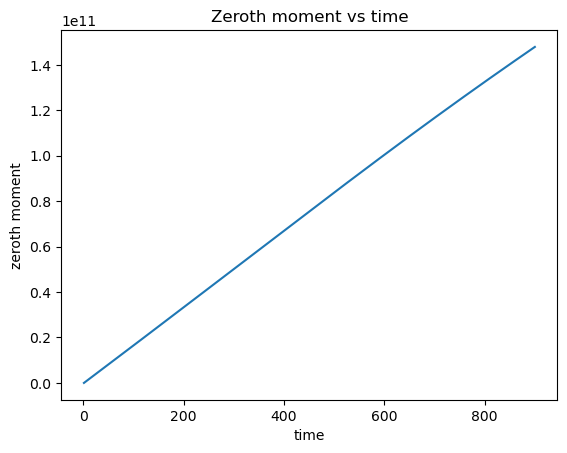

In [2]:
import matplotlib.pyplot as plt
plt.plot(sol.t,sol.y[0])
plt.title("Zeroth moment vs time")
plt.xlabel("time")
plt.ylabel("zeroth moment")

Text(0, 0.5, 'concentration')

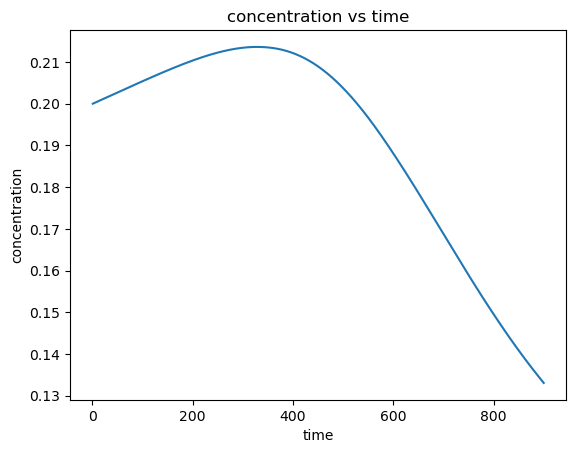

In [3]:
plt.plot(sol.t,sol.y[8])
plt.title("concentration vs time")
plt.xlabel("time")
plt.ylabel("concentration")

C:\Users\heman\AppData\Local\Temp\ipykernel_7260\2843172616.py:1: RuntimeWarning: invalid value encountered in divide
  plt.plot(sol.t,sol.y[3]/sol.y[2])


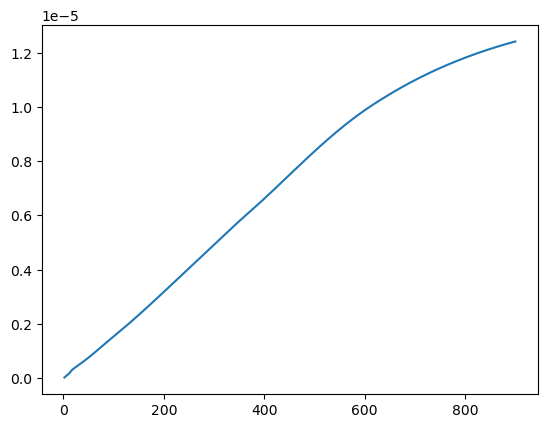

In [4]:
plt.plot(sol.t,sol.y[3]/sol.y[2])

In [5]:
def generateODE1(t,m):
    
    m0, m1, m2, m3, m4, m5, phi, M, c = m
    
    Ci = 0.11653781
    T = 40 
    Qi = 0.25*10**(-6)
    Qfi = 0.25*10**(-6)
    Q0 = 0.5*10**(-6)
    tau = 900
    
    rhoc = 1545
    rhof = 1092
    rho_as = 793 
    Kv = 3.14/6
    
    F = 0.0087 * (np.exp(0.0236*T))
    K_T = -0.0024*T + 1.6353
    xv = Qi*t/(Qfi*t + Qi*t)
    K = K_T-(0.00415*xv*100)
    x = Qi*rho_as*t/(Qfi*rhof*t + Qi*rho_as*t)
    
    ce = -0.8991*x**4 + 1.5372*x**3 - 0.4305*x**2 - 0.4919*x + 0.252
    
    CalphaS = (ce-F*K*(c - ce))/(1+K)
    
    Kg = 1.75*10**(-6)
    Kb = 2.5*10**(8)
    g = 1.65
    b = 0.15
    dlc = ((c/(1+K)) - CalphaS)
    
    G = Kg * (dlc)**g
    B = Kb * (dlc)**b
    
    dm0 = (-m0 / tau) + B
    dm1 = (G * m0) - (m1 / tau)
    dm2 = 2 * (G * m1) - (m2 / tau)
    dm3 = 3 * (G * m2) - (m3 / tau)
    dm4 = 4 * (G * m3) - (m4 / tau)
    dm5 = 5 * (G * m4) - (m5/ tau)
    
    phi = 1 - rhoc * m3
    C_c = rhoc * m3
    Total_S = (phi * c + 0.95 * C_c)*100
    
    rhos = 983.2 * (np.exp(0.0042*(Total_S)))
    rho_cal = (0.554/rhos)+ (0.446/rho_as)
    rhos1 = rho_cal**(-1)

    dphi = -rhoc*((3 * (G * m2) )- (m3/tau))
    
    dM = Qi*rho_as + Qfi*rhof -(Q0*x*rhos1) - (Q0*phi*rhos1)-(Q0*(1-phi)*rhoc)
    dc = ((Qfi*rhof*Ci) - (Q0*phi*rhos1*c) - (Q0*(1-phi)*rhoc) - ((4.23653751e-01*(c-0.95))*dphi) -((c*phi + 0.95*(1- phi)))*dM)/(4.23653751e-01*phi)
    return [dm0, dm1, dm2, dm3, dm4,dm5,dphi, dM, dc]

t_span = (901,14000)
num_points = 1000
initialConditions = [sol.y[0][num_points-1], sol.y[1][num_points-1], sol.y[2][num_points-1], sol.y[3][num_points-1], sol.y[4][num_points-1], sol.y[5][num_points-1], sol.y[6][num_points-1], sol.y[7][num_points-1], sol.y[8][num_points-1]]

sol1 = solve_ivp(
    lambda t, m: generateODE1(t, m),
    t_span,
    initialConditions,
    t_eval=np.linspace(t_span[0], t_span[1], num_points)
)

C:\Users\heman\AppData\Local\Temp\ipykernel_7260\898564576.py:33: RuntimeWarning: invalid value encountered in scalar power
  G = Kg * (dlc)**g
C:\Users\heman\AppData\Local\Temp\ipykernel_7260\898564576.py:34: RuntimeWarning: invalid value encountered in scalar power
  B = Kb * (dlc)**b


Text(0, 0.5, 'zeroth moment')

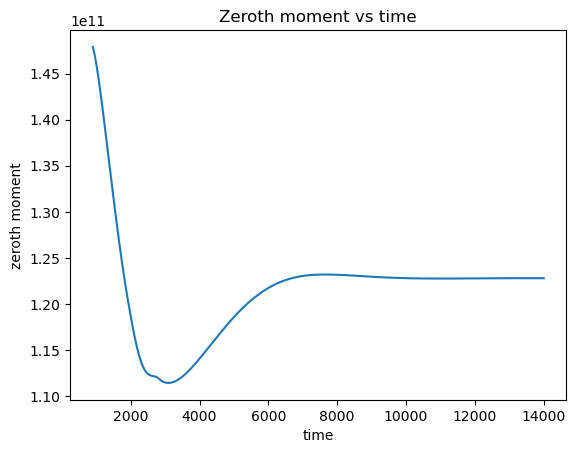

In [6]:
import matplotlib.pyplot as plt
plt.plot(sol1.t,sol1.y[0])
plt.title("Zeroth moment vs time")
plt.xlabel("time")
plt.ylabel("zeroth moment")

Text(0, 0.5, 'concentration')

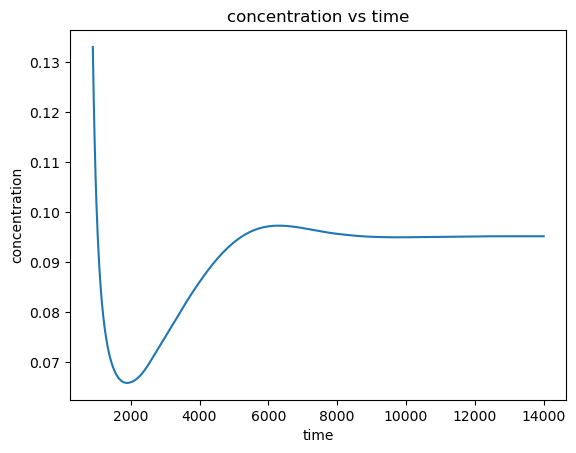

In [7]:
plt.plot(sol1.t,sol1.y[8])
plt.title("concentration vs time")
plt.xlabel("time")
plt.ylabel("concentration")

Text(0, 0.5, 'Zeroth')

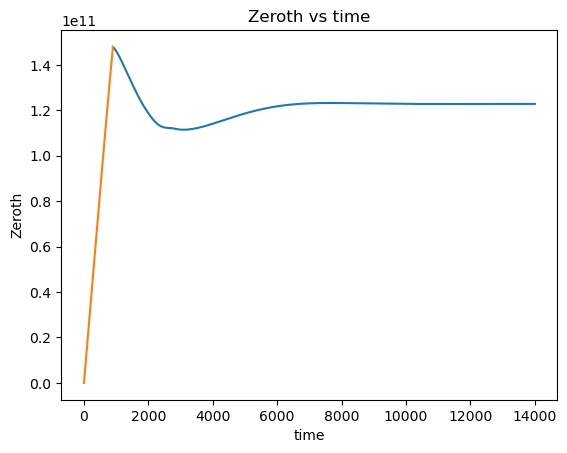

In [16]:
plt.plot(sol1.t,sol1.y[0])
plt.plot(sol.t,sol.y[0])
plt.title("Zeroth vs time")
plt.xlabel("time")
plt.ylabel("Zeroth")

Text(0, 0.5, 'concentration')

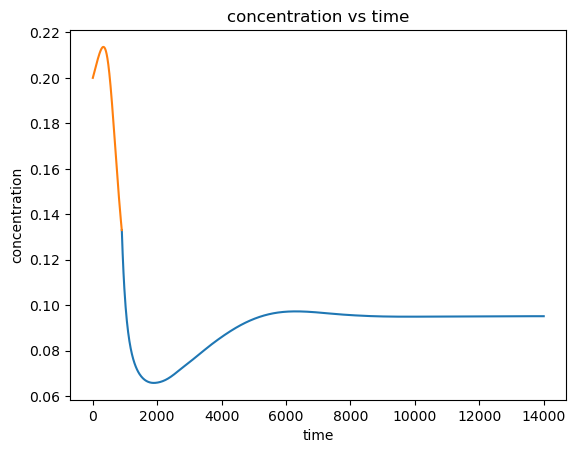

In [17]:
plt.plot(sol1.t,sol1.y[8])
plt.plot(sol.t,sol.y[8])
plt.title("concentration vs time")
plt.xlabel("time")
plt.ylabel("concentration")

C:\Users\heman\AppData\Local\Temp\ipykernel_14384\2127407714.py:1: RuntimeWarning: invalid value encountered in divide
  plt.plot(sol.t,sol.y[3]/sol.y[2])


(0.0, 2e-05)

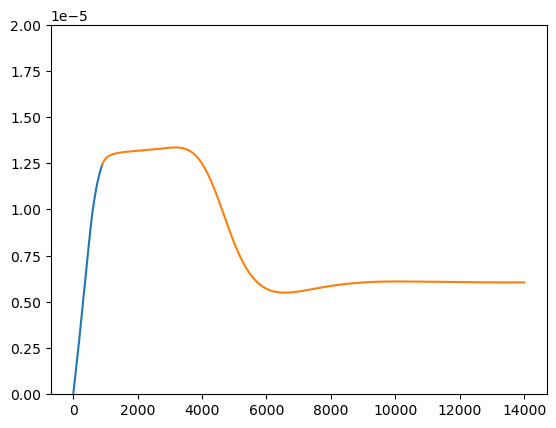

In [23]:
plt.plot(sol.t,sol.y[3]/sol.y[2])
plt.plot(sol1.t,sol1.y[3]/sol1.y[2])
plt.ylim(0,2*10**(-5))

# MSMPR modelling 1D with recycle

In [ ]:
def generateODE2(t,m):
    
    m0, m1, m2, m3, m4, m5, phi, M, c, Mt, ct = m
    
    Ci = 0.07762678
    T = 40 
    Qi = 0.125*10**(-6)
    Qfi = 0.125*10**(-6)
    Qr = 0.25*10**(-6)
    Q_outr = 0.5*10**(-6)
    Q0 = 0.5*10**(-6)
    tau = 900
    
    rhoc = 1545
    rhof = 1092
    rho_as = 793
    rho_r = 942.5
    rho_t = 942.5
    Kv = 3.14/6
    
    F = 0.0087 * (np.exp(0.0236*T))
    K_T = -0.0024*T + 1.6353
    xv = (Qi*t+Qr*t)/(Qfi*t + Qi*t+ Qr*t)
    K = K_T-(0.00415*xv*100)
    x = (Qi*rho_as*t+Qr*rho_r*t)/(Qfi*rhof*t + Qi*rho_as*t+Qr*rho_r*t)
    
    ce = -0.8991*x**4 + 1.5372*x**3 - 0.4305*x**2 - 0.4919*x + 0.252
    
    CalphaS = (ce-F*K*(c - ce))/(1+K)
    
    Kg = 1.75*10**(-6)
    Kb = 2.5*10**(8)
    g = 1.65
    b = 0.15
    dlc = ((c/(1+K)) - CalphaS)
    dlc= c-ce
    
    G = Kg * (dlc)**g
    B = Kb * (dlc)**b
    
    dm0 = (-m0 / tau) + B
    dm1 = (G * m0) - (m1 / tau)
    dm2 = 2 * (G * m1) - (m2 / tau)
    dm3 = 3 * (G * m2) - (m3 / tau)
    dm4 = 4 * (G * m3) - (m4 / tau)
    dm5 = 5 * (G * m4) - (m5/ tau)
    
    phi = 1 - rhoc * m3
    C_c = rhoc * m3
    Total_S = (phi * c + 0.95 * C_c)*100
    
    rhos = 983.2 * (np.exp(0.0042*(Total_S)))
    rho_cal = (0.554/rhos)+ (0.446/rho_as)
    rhos1 = rho_cal**(-1)
    phi_r = 0.8
    phi_t = phi

    dphi = -rhoc*((3 * (G * m2) )- (m3/tau))
    
    #dM = Qi*rho_as + Qfi*rhof +Qr*rho_r -(Q0*x*rhos1) - (Q0*phi*rhos1)-(Q0*(1-phi)*rhoc)
    
    #dc = ((Qfi*rhof*Ci)+ (Qr*rho_r*ct)+(Qr*(1-phi_r)*rhoc) - (Q0*phi*rhos1*c) - (Q0*(1-phi)*rhoc) - ((4.23653751e-01*(c-0.95))*dphi) -((c*phi + 0.95*(1- phi)))*dM)/(4.23653751e-01*phi)
    
    #dMt = (Q0*rhos1) + (Q0*(1-phi)*rhoc) - (Qr*rho_r*phi_r) -(Q_outr*phi_t*rhos1) - Q_outr*(1-phi_t)*rhoc
    
    
    #dct = ((Q0*rhos1*c)-(Qr*rho_r*phi_r*ct)-(Q_outr*phi_t*rhos1*ct)-(Q_outr*(1-phi_t)*rhoc)-((4.23653751e-01*(ct-0.95))*dphi)-((ct*phi+0.95*(1-phi))*dMt))/(4.23653751e-01*phi)
    
    

    
    dM = Qfi*rhof + Qi*rho_as + Qr*phi_r*rho_r + 0.95*Qr*(1-phi_r)*rhoc - Q0*rhos1*x - Q0*rhos1*phi*c-0.95*Q0*rhoc*(1-phi)
    dc = (Qfi * rhof * Ci) / (4.23653751e-01 * phi)  + (Qr*rho_r*ct)/(4.23653751e-01*phi) + (0.95*Qr*rhoc*(1-phi_r))/(4.23653751e-01*phi) - c/tau - (0.95*rhoc*(1-phi))/(tau*rhos) - (4.23653751e-01*(c-0.95)(-rhoc*(3 * (G * m2) - (m3 / tau))))/(4.23653751e-01*phi) - ((c*phi + 0.95*(1-phi))( Qfi*rhof + Qi*rho_as + Qr*phi_r*rho_r + 0.95*Qr*(1-phi)*rhoc - Q0*rhos*x - Q0*rhos*phi-0.95*Q0*rhoc*(1-phi)))/(4.23653751e-01*phi)
    
    dMt = Q0*phi*rhos1 + 0.95*Q0*(1-phi)*rhoc - Qr*phi_r*rho_r - 0.95*Qr*(1-phi_r)*rhoc - Q0*phi_t*rho_t - 0.95*Q0*(1-phi_t)*rho_c      # recycle with fines
    
    dct = (Q0*rhos1*c)/(4.23653751e-01*phi) + (0.95*Q0*(1-phi)*rhoc)/(4.23653751e-01*phi) - (Q0*rho_t*ct)/(4.23653751e-01*phi) -(0.95*Q0*(1-phi_t)*rhoc)/(4.23653751e-01*phi) - (Qr*rho_r*ct)/(4.23653751e-01*phi) - (0.95*Qr*(1-phi_r)*rhoc)/(4.23653751e-01*phi) - Mt(c-0.95)(-rhoc(3 * (G * m2) - (m3 / tau)))/(4.23653751e-01*phi) - (c*phi + 0.95*(1-phi))(Q0*phi*rhos1 - Qr*phi_r*rho_r - Q0*phi_t*rho_t)/(4.23653751e-01*phi)
    
    return [dm0, dm1, dm2, dm3, dm4, dm5, dphi, dM, dc, dMt, dct]

t_span = (901,14000)
num_points = 1000
initialConditions = [sol1.y[0][num_points-1], sol1.y[1][num_points-1], sol1.y[2][num_points-1], sol1.y[3][num_points-1], sol1.y[4][num_points-1], sol1.y[5][num_points-1], sol1.y[6][num_points-1], sol1.y[7][num_points-1], sol1.y[8][num_points-1],sol1.y[7][num_points-1], sol1.y[8][num_points-1]]

sol2 = solve_ivp(
    lambda t, m: generateODE2(t, m),
    t_span,
    initialConditions,
    t_eval=np.linspace(t_span[0], t_span[1], num_points)
)

In [ ]:
plt.plot(sol2.t,sol2.y[0])
plt.title("Zeroth vs time")
plt.xlabel("time")
plt.ylabel("Zeroth")

In [ ]:
plt.plot(sol2.t,sol2.y[8])
plt.title("concentration vs time")
plt.xlabel("time")
plt.ylabel("concentration")